In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
# Download the data
import urllib
import os
datapath = os.path.join("datasets", "lifesat", "")

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
        
    #shuffle indices
    data_list = list(range(36))
    np.random.shuffle(data_list)
    
    index_25 = data_list[0:9]
    index_50 = data_list[0:18]
    index_75 = data_list[0:27]
    all_indices = data_list[0:36]    

    sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[all_indices]
    linear_regression_25 = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[index_25]
    linear_regression_50 = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[index_50]
    linear_regression_75 = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[index_75]
    return sample_data, oecd_bli, gdp_per_capita, full_country_stats, linear_regression_25, linear_regression_50, linear_regression_75

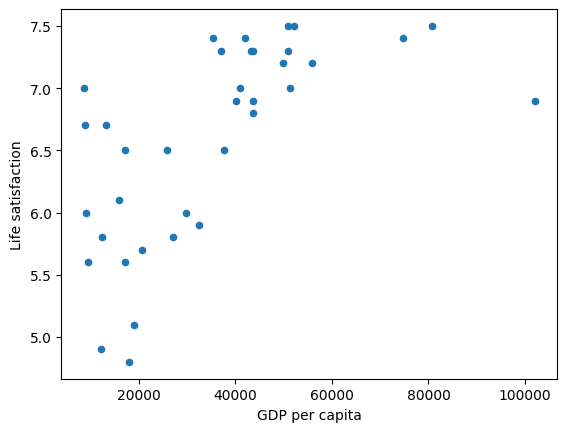

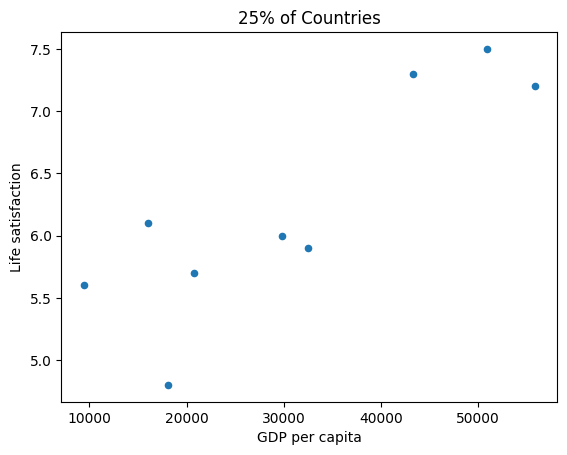

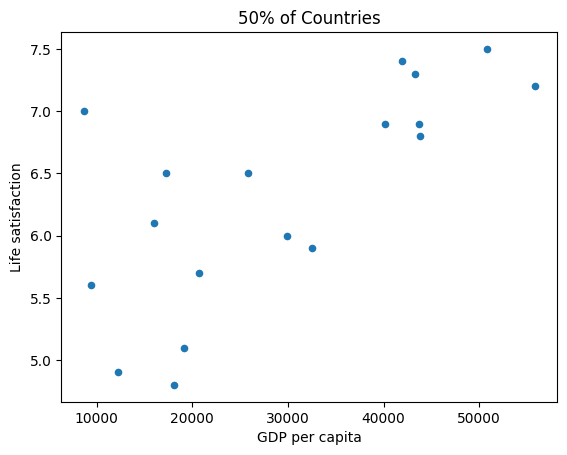

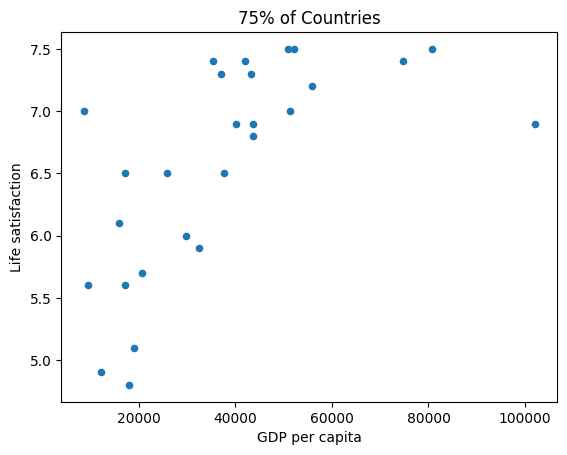

In [4]:
# Code example

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
sample_data, oecd_bli, gdp_per_capita, full_country_stats, linear_regression_25, linear_regression_50, linear_regression_75 = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[sample_data["GDP per capita"]]
y = np.c_[sample_data["Life satisfaction"]]
X_25 = np.c_[linear_regression_25["GDP per capita"]]
y_25 = np.c_[linear_regression_25["Life satisfaction"]]
X_50 = np.c_[linear_regression_50["GDP per capita"]]
y_50 = np.c_[linear_regression_50["Life satisfaction"]]
X_75 = np.c_[linear_regression_75["GDP per capita"]]
y_75 = np.c_[linear_regression_75["Life satisfaction"]]

# Visualize the data for all, 25%, 50% and 75% countries
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()
linear_regression_25.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', title='25% of Countries')
plt.show()
linear_regression_50.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', title='50% of Countries')
plt.show()
linear_regression_75.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', title='75% of Countries')
plt.show()

In [5]:
sample_data[0:36]

,GDP per capita,Life satisfaction
Country,,
Slovenia,20732.482,5.7
Japan,32485.545,5.9
Iceland,50854.583,7.5
Greece,18064.288,4.8
Italy,29866.581,6.0
United States,55805.204,7.2
Turkey,9437.372,5.6
Slovak Republic,15991.736,6.1
Canada,43331.961,7.3


In [6]:

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model # SUPERVISED ALGORITHM --> INPUT AND OUTPUT FOR TRANING
model.fit(X_25, y_25)
model.fit(X_50, y_50)
model.fit(X_75, y_75)
model.fit(X, y)


LinearRegression()

In [7]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))

In [9]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression() #100% data
lin2 = linear_model.LinearRegression() #25% data
lin3 = linear_model.LinearRegression() #50% data
lin4 = linear_model.LinearRegression() #75% data

Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
X_25 = np.c_[linear_regression_25["GDP per capita"]]
y_25 = np.c_[linear_regression_25["Life satisfaction"]]
X_50 = np.c_[linear_regression_50["GDP per capita"]]
y_50 = np.c_[linear_regression_50["Life satisfaction"]]
X_75 = np.c_[linear_regression_75["GDP per capita"]]
y_75 = np.c_[linear_regression_75["Life satisfaction"]]

lin1.fit(Xsample, ysample)
lin2.fit(X_25, y_25)
lin3.fit(X_50, y_50)
lin4.fit(X_75, y_75)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]  # 100% countries 
t0_25, t1_25 = lin2.intercept_[0], lin2.coef_[0][0]  # 25% countries 
t0_50, t1_50 = lin3.intercept_[0], lin3.coef_[0][0]   # 50% countries 
t0_75, t1_75 = lin4.intercept_[0], lin4.coef_[0][0]    # 75% countries 


In [10]:
t0, t1

(5.763029861307918, 2.3177337047396068e-05)

In [11]:
t0_25, t1_25 

(4.7638992728366745, 4.781761725146977e-05)

In [12]:
t0_50, t1_50

(5.139795189222255, 4.0777932029824364e-05)

In [13]:
t0_75, t1_75

(5.654835658324022, 2.4095218116238682e-05)

Saving figure ridge_model_plot


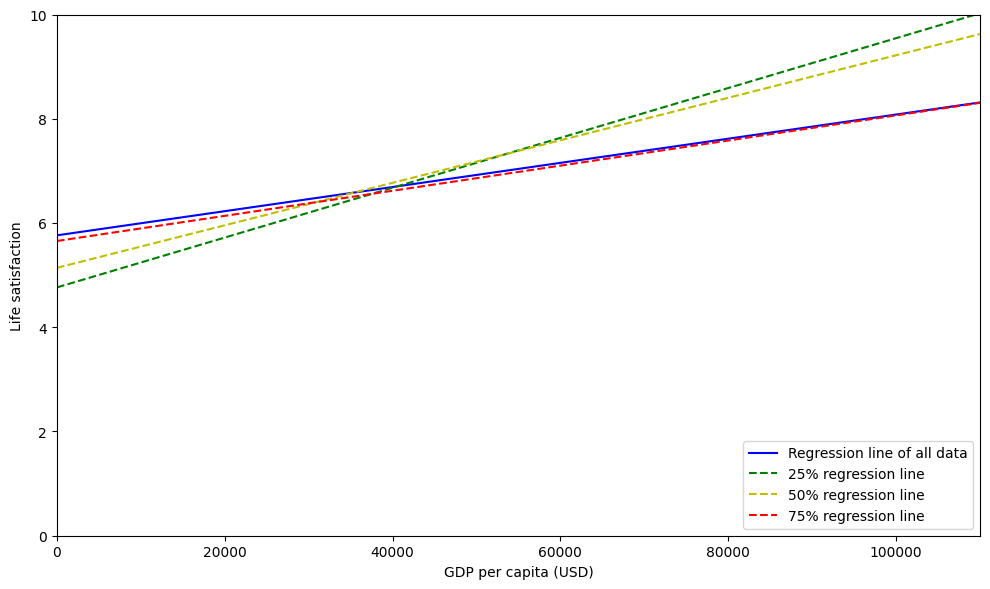

In [14]:
plt.figure(figsize=(10,6))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')



X = np.linspace(0, 110000, 1000)

plt.plot(X, t0 + t1*X, "b", label="Regression line of all data")
plt.plot(X, t0_25 + t1_25*X, "g--", label="25% regression line")
plt.plot(X, t0_50 + t1_50*X, "y--", label="50% regression line")
plt.plot(X, t0_75 + t1_75*X, "r--", label="75% regression line")


plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")
save_fig('ridge_model_plot')
plt.show()